In [4]:
#Import dependency
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from datetime import datetime
import requests
import psycopg2
# import config as creds
import csv


In [ ]:
# def connect():
    
#     # Set up a connection to the postgres server.
#     conn_string = "host="+ creds.PGHOST +" port="+ "5432" +" dbname="+ creds.PGDATABASE +" user=" + creds.PGUSER \
#                  +" password="+ creds.PGPASSWORD
    
#     conn = psycopg2.connect(conn_string)
#     #print("Connected!")

#     #Create a cursor object
#     cursor = conn.cursor()
    
#     return conn, cursor


In [ ]:
# # Connecting to DB

# conn, cursor = connect()

# # SQL command to create inventory table
# sql = "select * from ames;"
# #cursor.execute(sql)
# df = pd.read_sql_query(sql, conn)
# #conn.commit()
# # dat = pd.read_sql_query(sql, conn)


In [5]:
df = pd.read_csv('Resources/cleaned_ames_dataset.csv')
df.head()

,ames_order,pid,mssubclass,mszoning,lotarea,street,lotshape,landcontour,lotconfig,landslope,...,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice,total_area
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,Corner,Gtl,...,0,0,0,0,5,2010,WD,Normal,215000,4920
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,Inside,Gtl,...,0,120,0,0,6,2010,WD,Normal,105000,3404
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,Corner,Gtl,...,0,0,0,12500,6,2010,WD,Normal,172000,4299
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,Corner,Gtl,...,0,0,0,0,4,2010,WD,Normal,244000,6852
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,Inside,Gtl,...,0,0,0,0,3,2010,WD,Normal,189900,4668


**Final Data Cleaning before importing the dataset into our model**

In [6]:
#Drop the ames_order, pid column since it doesn't help with prediction
df.drop(columns=["ames_order"], axis=1, inplace=True)
# df.set_index(df['pid'],inplace=True)
df

,pid,mssubclass,mszoning,lotarea,street,lotshape,landcontour,lotconfig,landslope,neighborhood,...,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice,total_area
0,526301100,20,RL,31770,Pave,IR1,Lvl,Corner,Gtl,NAmes,...,0,0,0,0,5,2010,WD,Normal,215000,4920
1,526350040,20,RH,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,...,0,120,0,0,6,2010,WD,Normal,105000,3404
2,526351010,20,RL,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,...,0,0,0,12500,6,2010,WD,Normal,172000,4299
3,526353030,20,RL,11160,Pave,Reg,Lvl,Corner,Gtl,NAmes,...,0,0,0,0,4,2010,WD,Normal,244000,6852
4,527105010,60,RL,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,...,0,0,0,0,3,2010,WD,Normal,189900,4668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2757,923275080,80,RL,7937,Pave,IR1,Lvl,CulDSac,Gtl,Mitchel,...,0,0,0,0,3,2006,WD,Normal,142500,3597
2758,923276100,20,RL,8885,Pave,IR1,Low,Inside,Mod,Mitchel,...,0,0,0,0,6,2006,WD,Normal,131000,3152
2759,923400125,85,RL,10441,Pave,Reg,Lvl,Inside,Gtl,Mitchel,...,0,0,0,700,7,2006,WD,Normal,132000,2852
2760,924100070,20,RL,10010,Pave,Reg,Lvl,Inside,Mod,Mitchel,...,0,0,0,0,4,2006,WD,Normal,170000,4585


In [7]:
categorical = df.select_dtypes('object')
categorical.columns

Index(['mszoning', 'street', 'lotshape', 'landcontour', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd',
       'masvnrtype', 'exterqual', 'extercond', 'foundation', 'heating',
       'heatingqc', 'centralair', 'electrical', 'kitchenqual', 'functional',
       'paveddrive', 'saletype', 'salecondition'],
      dtype='object')

In [8]:
numerical = df.select_dtypes(exclude='object')
numerical.columns

Index(['pid', 'mssubclass', 'lotarea', 'overallqual', 'overallcond',
       'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2',
       'bsmtunfsf', 'totalbsmtsf', '1stflrsf', '2ndflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd', 'fireplaces',
       'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf', 'openporchsf',
       'enclosedporch', '3ssnporch', 'screenporch', 'poolarea', 'miscval',
       'mosold', 'yrsold', 'saleprice', 'total_area'],
      dtype='object')

**check if our data are normally distributed in order to be used in linear regression model**

In [9]:
#Check skewness of the dataset
from scipy.stats import skew 
skewness = numerical.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

miscval          21.358067
poolarea         16.432732
lotarea          12.990651
lowqualfinsf     12.131730
3ssnporch        11.343489
kitchenabvgr      4.220799
bsmtfinsf2        4.026744
enclosedporch     3.979661
screenporch       3.882597
bsmthalfbath      3.818322
openporchsf       2.660786
masvnrarea        2.474363
saleprice         1.837788
wooddecksf        1.824971
1stflrsf          1.513314
bsmtfinsf1        1.431787
mssubclass        1.427484
total_area        1.357359
grlivarea         1.289576
totalbsmtsf       1.193826
bsmtunfsf         0.938686
2ndflrsf          0.914635
totrmsabvgrd      0.765231
halfbath          0.761664
fireplaces        0.725214
bsmtfullbath      0.616436
overallcond       0.582144
bedroomabvgr      0.303137
overallqual       0.293918
garagearea        0.266859
fullbath          0.238783
mosold            0.188568
yrsold            0.141621
pid              -0.020762
garagecars       -0.175933
yearremodadd     -0.392857
yearbuilt        -0.559509
g

In [10]:
# #normalize the data by taking log
# skewness = np.log(skewness)
# skewness.sort_values(ascending=False)

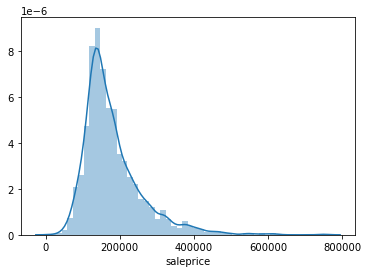

In [11]:
# check if saleprice is normally distributed in order to be used in our Multiple linear regression model later
sns.distplot(df['saleprice']);
#we can see the saleprice is right skewed

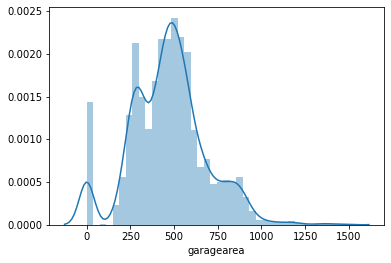

In [12]:
#check the distribution of garagearea
sns.distplot(df['garagearea']);

In [13]:
#dropping any NA before putting the dataset into our model
df = df.dropna()
df.isnull().sum()

pid              0
mssubclass       0
mszoning         0
lotarea          0
street           0
                ..
yrsold           0
saletype         0
salecondition    0
saleprice        0
total_area       0
Length: 66, dtype: int64

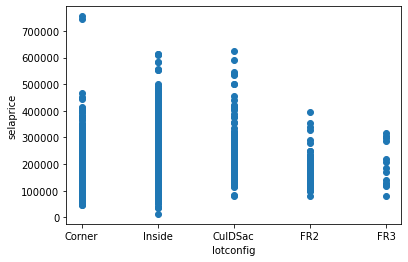

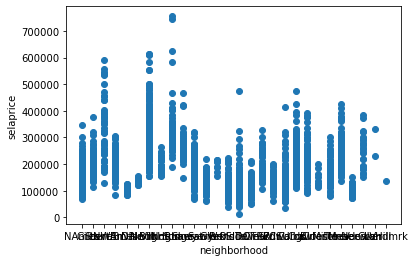

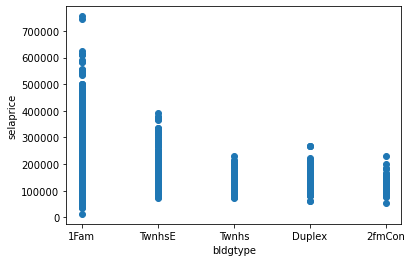

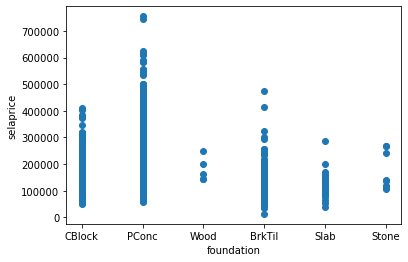

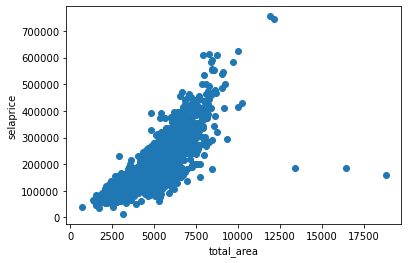

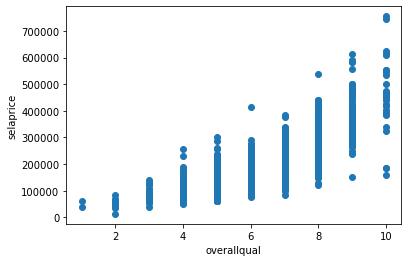

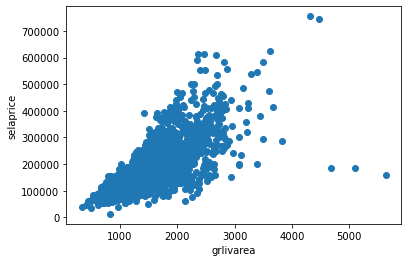

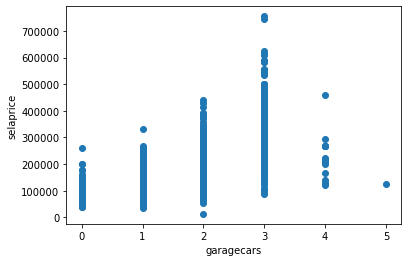

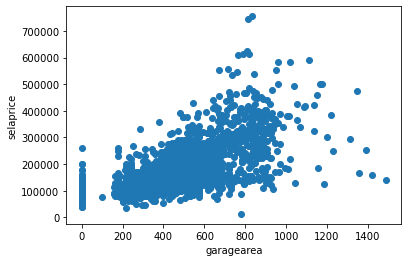

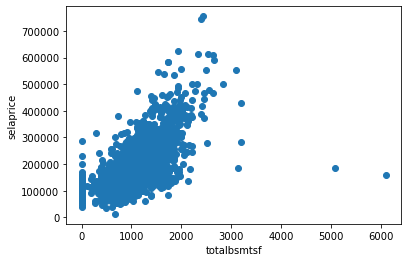

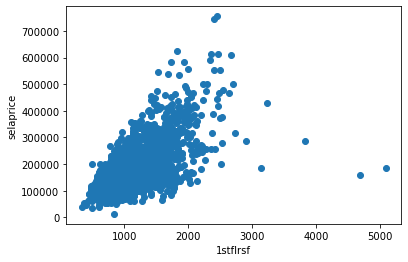

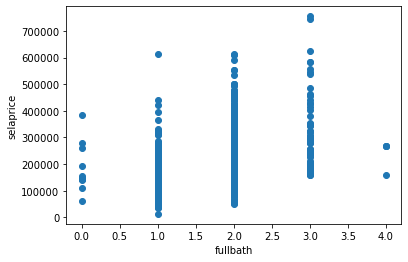

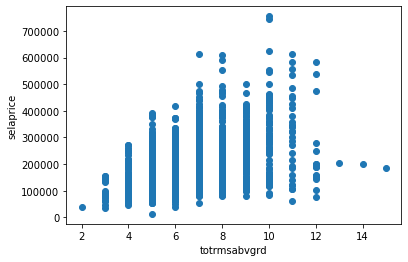

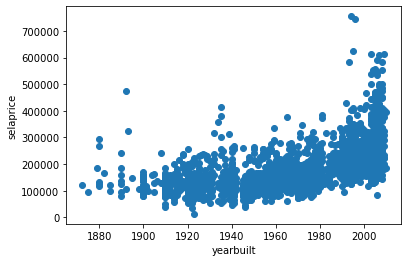

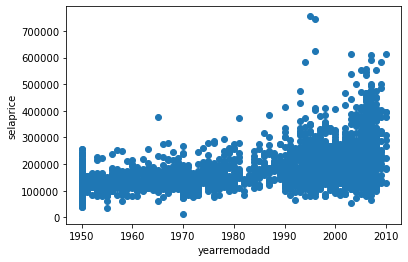

In [14]:
#See the relationship between selected features and target
x_features = ["lotconfig", "neighborhood", "bldgtype", "foundation","total_area","overallqual","grlivarea", "garagecars","garagearea","totalbsmtsf","1stflrsf","fullbath","totrmsabvgrd", "yearbuilt","yearremodadd"]
for x in x_features:

  plt.scatter(df[x], df['saleprice'])
  plt.xlabel(x)
  plt.ylabel('selaprice')
  plt.show()

# **Initial Features Selection**
we selected 15 features.

***NUmerical Category:***
Based on heatmap, pick the top 11 features that are most correlated to sales price(vmax>0.5). We also added another additional features: total_area

* overallqual
* grlivarea	
* garagecars
* garagearea
* totalbsmtsf	
* 1stflrsf
* fullbath	
* totrmsabvgrd
* yearbuilt	
* yearremodadd
* ADDED total_area

***Categorical Category:***
Categorical object can not be compared using heatmap so we selected a few more features based on commonsense
* lotconfig
* neighborhood
* bldgtype
* foundation


**Use Label Encoder to to transform categorical features**

In [15]:
#Convert numerical categories that shouldn't be numerical to categorical categories
#please refer to the description file for definition of each category
df['mssubclass'] = df['mssubclass'].astype(str)
df['overallcond'] = df['overallcond'].astype(str)
df['overallqual'] = df['overallqual'].astype(str)
df.dtypes

pid               int64
mssubclass       object
mszoning         object
lotarea           int64
street           object
                  ...  
yrsold            int64
saletype         object
salecondition    object
saleprice         int64
total_area        int64
Length: 66, dtype: object

In [16]:
#transform text into numerical data by applying LabelEncoder 
from sklearn.preprocessing import LabelEncoder
cols = ['mssubclass', 'mszoning', 'street', 'lotshape', 'landcontour',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'salecondition',
       'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'exterqual',
       'extercond', 'foundation', 'heating', 'heatingqc', 'centralair',
       'electrical', 'kitchenqual', 'functional', 'paveddrive', 'saletype','overallcond', 'overallqual']


# # Label Encoder DataFrame for neighborhood columns
# le = LabelEncoder()
# df2 = df[['neighborhood']].copy(())
# df2['neighborhood_encoded'] = le.fit_transform(list(df['neighborhood'].values))

# print(df2.neighborhood_encoded.unique())
# print(df2.neighborhood.unique())

# Code = [15,8,25,17,2,16,19,0,18,24,23,22,9,3,20,11,4,21,7,5,6,1,14,26,13,27,10,12]
# Name = ['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'BrDale', 'NPkVill', 'NridgHt',
#  'Blmngtn', 'NoRidge', 'Somerst', 'SawyerW', 'Sawyer', 'Greens', 'BrkSide', 
# 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU', 'Edwards', 'CollgCr', 'Crawfor',
#  'Blueste', 'Mitchel', 'Timber', 'MeadowV', 'Veenker', 'GrnHill', 'Landmrk']

# df_neighborhood = pd.DataFrame(Code, Name, columns=['Label Encoder'])
# df_neighborhood

# le = LabelEncoder()
# df2 = df[['yrsold']].copy(())
# df2['yrsold_encoded'] = le.fit_transform(list(df['yrsold'].values))

# print(df2.yrsold_encoded.unique())
# print(df2.yrsold.unique())

# Code = [4,3,2,1,0]
# Name = ['2010', '2009', '2008', '2007', '2006']
# df_yrsold = pd.DataFrame(Code, Name, columns=['Label Encoder'])
# df_yrsold


# le = LabelEncoder()
# df2 = df[['overallqual']].copy(())
# df2['overallqual_encoded'] = le.fit_transform(list(df['overallqual'].values))

# print(df2.overallqual_encoded.unique())
# print(df2.overallqual.unique())

# Code = [6, 5, 7, 8, 9, 4, 3, 2, 1, 0]
# Name = ['6', '5', '7', '8', '9', '4', '3', '2', '10', '1']
# df_overallqual = pd.DataFrame(Code, Name, columns=['Label Encoder'])
# df_overallqual

values = []

for col in cols:
    
    names = df[col].unique
    print(f"names = {names}")
  
    le = LabelEncoder()
    le.fit(list(df[col].values))
    numbers = le.fit_transform(list(df[col].values))
    df[col] = numbers
    
    values.append({"names": names, "numbers": numbers})
    


names = <bound method Series.unique of 0       20
1       20
2       20
3       20
4       60
        ..
2757    80
2758    20
2759    85
2760    20
2761    60
Name: mssubclass, Length: 2762, dtype: object>
names = <bound method Series.unique of 0       RL
1       RH
2       RL
3       RL
4       RL
        ..
2757    RL
2758    RL
2759    RL
2760    RL
2761    RL
Name: mszoning, Length: 2762, dtype: object>
names = <bound method Series.unique of 0       Pave
1       Pave
2       Pave
3       Pave
4       Pave
        ... 
2757    Pave
2758    Pave
2759    Pave
2760    Pave
2761    Pave
Name: street, Length: 2762, dtype: object>
names = <bound method Series.unique of 0       IR1
1       Reg
2       IR1
3       Reg
4       IR1
       ... 
2757    IR1
2758    IR1
2759    Reg
2760    Reg
2761    Reg
Name: lotshape, Length: 2762, dtype: object>
names = <bound method Series.unique of 0       Lvl
1       Lvl
2       Lvl
3       Lvl
4       Lvl
       ... 
2757    Lvl
2758    Low
2759    Lvl


# **Step 4: Multiple Linear Regression Model: Predict house prices based on the selected features**
* Set x and y
* Scale x and y
* Split the data into train and test (X:features, y=target)
* Create an instance of the model with model = LinearRegression().
* Train the model with the dataset with model.fit(X,y)
* Create predictions with y_pred = model.predict(X)


In [17]:
df

,pid,mssubclass,mszoning,lotarea,street,lotshape,landcontour,lotconfig,landslope,neighborhood,...,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice,total_area
0,526301100,5,1,31770,1,0,3,0,0,15,...,0,0,0,0,5,2010,9,4,215000,4920
1,526350040,5,0,11622,1,3,3,4,0,15,...,0,120,0,0,6,2010,9,4,105000,3404
2,526351010,5,1,14267,1,0,3,0,0,15,...,0,0,0,12500,6,2010,9,4,172000,4299
3,526353030,5,1,11160,1,3,3,0,0,15,...,0,0,0,0,4,2010,9,4,244000,6852
4,527105010,10,1,13830,1,0,3,4,0,8,...,0,0,0,0,3,2010,9,4,189900,4668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2757,923275080,13,1,7937,1,0,3,1,0,14,...,0,0,0,0,3,2006,9,4,142500,3597
2758,923276100,5,1,8885,1,0,2,4,1,14,...,0,0,0,0,6,2006,9,4,131000,3152
2759,923400125,14,1,10441,1,3,3,4,0,14,...,0,0,0,700,7,2006,9,4,132000,2852
2760,924100070,5,1,10010,1,3,3,4,1,14,...,0,0,0,0,4,2006,9,4,170000,4585


In [18]:
#put our selected features into a list

cols_8 = ["neighborhood","total_area","overallqual", "garagecars","fullbath","yearbuilt","yearremodadd","yrsold"]


#assign y to our target and x to our features 

y = df[["pid","saleprice"]]
# X = df[cols_8]
X = df
X = X.drop(['saleprice'], axis=1)
y





,pid,saleprice
0,526301100,215000
1,526350040,105000
2,526351010,172000
3,526353030,244000
4,527105010,189900
...,...,...
2757,923275080,142500
2758,923276100,131000
2759,923400125,132000
2760,924100070,170000


Perform 80/20 data split

In [19]:
#data is split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)
#check the shape of each set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2209, 65), (553, 65), (2209, 2), (553, 2))

In [20]:
X_train
y_train

,pid,saleprice
330,527162120,191000
2567,905300080,142500
921,923276260,149000
1845,902125120,100000
1980,906426060,277000
...,...,...
763,906380050,212000
835,908225290,120000
1653,528275110,219500
2607,907125080,145000


In [21]:
y_train_final = y_train['saleprice'].values
y_train_final
y_test_final = y_test['saleprice'].values
y_test_final

array([177000, 230500, 215700, 203000, 234250, 169000, 118000, 189000,
       158000, 151000, 143000, 418000, 221500, 137500, 119000, 139000,
       114000, 238000, 163000, 148000, 538000, 243000, 206300, 177000,
       255000, 164990, 145000, 185000,  97000,  96000, 108000, 265900,
        99500, 145000,  85400, 189000, 136500, 229000, 176432, 215000,
       552000, 193000, 104900, 127500, 177625, 224500, 156000, 147000,
       100000, 175900, 165000, 260000, 172000, 138400, 232000, 168000,
       157000, 159000, 110000,  84900, 189000, 286000, 556581,  88250,
       160500, 149500, 137000, 237500, 545224, 129900, 175000, 153500,
       148000, 378500, 322400, 200000, 258000, 157500, 127000, 350000,
       214500, 155891, 145400, 146500, 460000, 119164, 316500, 109500,
       241500, 228000, 116500, 148000, 293000, 213500, 163000, 441929,
       157000, 270000, 250000, 170000, 127500, 144000,  37900, 130000,
       126500, 207500, 135000, 150000, 213000, 160000, 224500, 133500,
      

In [22]:
# Reshape the y values and then print them out
y_train_final = y_train_final.reshape(-1, 1)
y_test_final = y_test_final.reshape(-1, 1)
print(y_train_final.shape)
print(y_test_final.shape)

(2209, 1)
(553, 1)


In [23]:

# Define a scaler for the X values and the y values and fit them to the training set

X_scaler = preprocessing.StandardScaler().fit(X_train[cols_8])


# Scale the training set and the testing set using the new scalers
X_train_scaled = X_scaler.transform(X_train[cols_8])
X_test_scaled = X_scaler.transform(X_test[cols_8])


#Take a log of the target to make it more normally distributed
y_train_scaled = np.log(y_train_final)
y_test_scaled = np.log(y_test_final)

**Fit data to our Multiple Linear Regression Model**

In [24]:
#define the model
model = linear_model.LinearRegression()
#build training model --> time start time 
start=datetime.now()

# Fit the model to the scaled training set
model.fit(X_train_scaled, y_train_scaled)

#time the end time
end=datetime.now()

#run prediction on scaled test set 
y_test_pred = model.predict(X_test_scaled)



In [25]:
# Export our model 
from pickle import dump as p_dump
from joblib import dump, load
dump(model, 'mlr_model.joblib') 
p_dump(X_scaler, open('scaler.pkl', 'wb'))

In [23]:
#print the coefficient, intercept, MSE and model score(R^2),and model run time
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Mean squared Error(MSE): {mean_squared_error(y_test_scaled, y_test_pred):.2f}")
print(f"Coefficient of Determination(R^2): {r2_score(y_test_scaled, y_test_pred):.2f}")
time_taken = end - start
print(f"Time to run the model: {time_taken}")


Coefficients: [[ 0.00428309  0.21215925  0.09526144  0.03506679 -0.01836104  0.06779652
   0.05328184 -0.0076852 ]]
Intercept: [12.01627885]
Mean squared Error(MSE): 0.03
Coefficient of Determination(R^2): 0.86
Time to run the model: 0:00:00.002991


In [24]:
y_test_pred
y_test_pred = np.exp(y_test_pred)
y_test_pred

array([[135090.82829148],
       [251788.18797021],
       [194295.77352782],
       [256493.47630593],
       [220390.33319449],
       [151288.17601329],
       [108031.59362886],
       [196260.86961696],
       [162432.67874475],
       [143185.88791932],
       [151135.92061676],
       [415967.00721188],
       [255283.60055316],
       [135420.51907196],
       [165819.19258634],
       [122175.47516959],
       [111190.45000253],
       [257080.54362699],
       [159267.64110194],
       [154375.55693624],
       [426549.52175419],
       [209004.90703857],
       [223525.41030768],
       [171425.89653   ],
       [277606.80214462],
       [197612.91510516],
       [197237.93890893],
       [179720.686279  ],
       [ 95244.84293243],
       [103340.40835109],
       [105048.89331308],
       [233714.07323219],
       [119429.81884665],
       [151086.10123253],
       [119587.26610224],
       [187254.64018192],
       [140174.25941247],
       [264059.17461297],
       [1859

In [27]:
y_test_df = pd.DataFrame(y_test)
y_test_df['y_test_pred']= y_test_pred
y_test_df
y_test_df.rename(columns={0: "saleprice"}, inplace=True)
y_test_df

y_test_df.to_csv('Resources/y_test_vs_pred_mlr.csv', index=False)


**Formula for our multiple linear regression model**

y = -2.67021895e-16 + 0.03896429*neighborhood + 0.60886396*total_area + 0.13411633*overallqual + 0.08067865*garagecars + (-0.07035814*fullbath) + 0.16385461*yearbuilt +0.12970701*yearremodadd +(-0.01437204*yrsold) 

**An example of how we get the result for different number of features**

cols_64 = ['mssubclass', 'mszoning', 'lotarea', 'street', 'lotshape',
       'landcontour', 'lotconfig', 'landslope', 'neighborhood', 'condition1',
       'condition2', 'bldgtype', 'housestyle', 'overallqual', 'overallcond',
       'yearbuilt', 'yearremodadd', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'masvnrarea', 'exterqual', 'extercond',
       'foundation', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf',
       'heating', 'heatingqc', 'centralair', 'electrical', '1stflrsf',
       '2ndflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath',
       'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'garageyrblt', 'garagecars',
       'garagearea', 'paveddrive', 'wooddecksf', 'openporchsf',
       'enclosedporch', '3ssnporch', 'screenporch', 'poolarea', 'miscval',
       'mosold', 'yrsold', 'saletype', 'salecondition','total_area']
cols_54 = [
       'condition2', 'bldgtype', 'housestyle', 'overallqual', 'overallcond',
       'yearbuilt', 'yearremodadd', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'masvnrarea', 'exterqual', 'extercond',
       'foundation', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf',
       'heating', 'heatingqc', 'centralair', 'electrical', '1stflrsf',
       '2ndflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath',
       'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'garageyrblt', 'garagecars',
       'garagearea', 'paveddrive', 'wooddecksf', 'openporchsf',
       'enclosedporch', '3ssnporch', 'screenporch', 'poolarea', 'miscval',
       'mosold', 'yrsold', 'saletype', 'salecondition','total_area']
cols_44 = [
       'condition2', 'bldgtype', 'housestyle', 'overallqual', 'overallcond',
       'yearbuilt', 'yearremodadd', 'roofstyle', 'roofmatl', 'exterior1st',
       'heating', 'heatingqc', 'centralair', 'electrical', '1stflrsf',
       '2ndflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath',
       'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'garageyrblt', 'garagecars',
       'garagearea', 'paveddrive', 'wooddecksf', 'openporchsf',
       'enclosedporch', '3ssnporch', 'screenporch', 'poolarea', 'miscval',
       'mosold', 'yrsold', 'saletype', 'salecondition','total_area']
cols_34 = [
       'overallqual', 'overallcond',
       'yearbuilt', 'yearremodadd', '1stflrsf',
       '2ndflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath',
       'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'garageyrblt', 'garagecars',
       'garagearea', 'paveddrive', 'wooddecksf', 'openporchsf',
       'enclosedporch', '3ssnporch', 'screenporch', 'poolarea', 'miscval',
       'mosold', 'yrsold', 'saletype', 'salecondition','total_area']
cols_24 = [
       'overallqual', 'overallcond',
       'yearbuilt', 'yearremodadd', '1stflrsf',
       '2ndflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath',
       'fullbath', 'halfbath', 'garagecars',
       'garagearea', 
       'enclosedporch', '3ssnporch', 'screenporch', 'poolarea', 'miscval',
       'mosold', 'yrsold', 'saletype', 'salecondition','total_area']

cols_15 = ["total_area","overallqual","grlivarea", "garagecars","garagearea","totalbsmtsf","1stflrsf","fullbath","totrmsabvgrd", "yearbuilt","yearremodadd"]

cols_11 = ["lotconfig", "neighborhood", "bldgtype", "foundation","total_area","overallqual","totrmsabvgrd", "yearbuilt","yearremodadd"]

cols_8 = ["neighborhood","total_area","overallqual", "garagecars","fullbath","yearbuilt","yearremodadd","yrsold"]

n = [cols_64,cols_54,cols_44,cols_34,cols_24, cols_15, cols_11, cols_8]
#assign y to our target and x to our features 

for i in n:
    y = df['saleprice'].values
    X = df[i]
    #data is split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)
    #check the shape of each set
    X_train.shape, X_test.shape, y_train.shape, y_test.shape
    print(X_train.shape)
    # Define a scaler for the X values and the y values and fit them to the training set
    X_scaler = preprocessing.StandardScaler().fit(X_train)


    # Scale the training set and the testing set using the new scalers
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)


    #Take a log to normalize the target
    y_train_scaled = np.log(y_train)
    y_test_scaled = np.log(y_test)

    # Reshape the y values and then print them out
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    #define the model
    model = linear_model.LinearRegression()
    #build training model --> time start time 
    start=datetime.now()

    # Fit the model to the scaled training set
    model.fit(X_train_scaled, y_train_scaled)

    #time the end time
    end=datetime.now()

    #run prediction on scaled test set 
    y_test_pred = model.predict(X_test_scaled)

    #print the coefficient, intercept, MSE and model score(R^2),and model run time
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_}")
    print(f"Mean squared Error(MSE): {mean_squared_error(y_test_scaled, y_test_pred):.2f}")
    print(f"Coefficient of Determination(R^2): {r2_score(y_test_scaled, y_test_pred):.2f}")
    time_taken = end - start
    print(f"Time to run the model: {time_taken}")
    
    

#Compare with Deep Learning Model
nn_model = tf.keras.models.Sequential()

nn_model.add(tf.keras.layers.Dense(units=len(X.columns) * 2, activation = "relu", input_dim = len(X.columns)))
nn_model.add(tf.keras.layers.Dense(units=1, activation="linear"))
nn_model.summary()
nn_model.compile(loss="mean_squared_error", optimizer="adam")
#time starting time
start_1=datetime.now()

nn_model.fit(X_train_scaled, y_train_scaled, epochs=100)
#time ending time
end_1=datetime.now()

y_train_pred = nn_model.predict(X_train_scaled)
y_test_pred = nn_model.predict(X_test_scaled)



# Evaluate the performance of the neural network
print(f"R^2 for training set: {r2_score(y_train_scaled, y_train_pred):.2f}")
print(f"R^2 for testing set: {r2_score(y_test_scaled, y_test_pred):.2f}")


deep_model = tf.keras.models.Sequential()
deep_model.add(tf.keras.layers.Dense(units=len(X.columns) * 2, activation = "relu", input_dim = len(X.columns)))
deep_model.add(tf.keras.layers.Dense(units=len(X.columns) * 2, activation = "relu"))
deep_model.add(tf.keras.layers.Dense(units=1, activation="linear"))
deep_model.summary()

deep_model.compile(loss="mean_squared_error", optimizer="adam")
#start deep learning starting time
start_2=datetime.now()
deep_model.fit(X_train_scaled, y_train_scaled, epochs=100)
#time deep learning ending time
end_2=datetime.now()
y_train_pred = deep_model.predict(X_train_scaled)
y_test_pred = deep_model.predict(X_test_scaled)

# Evaluate the performance and run time of the deep learning model
print(f"R^2 for training set: {r2_score(y_train_scaled, y_train_pred):.2f}")
print(f"R^2 for testing set: {r2_score(y_test_scaled, y_test_pred):.2f}")
time_taken_neu = end_1 - start_1
time_taken_dl = end_2 - start_2
total_time = time_taken_dl + time_taken_neu
print(f"Time to run the model: {total_time}")

C:\Users\chiko\anaconda3\envs\PythonData\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


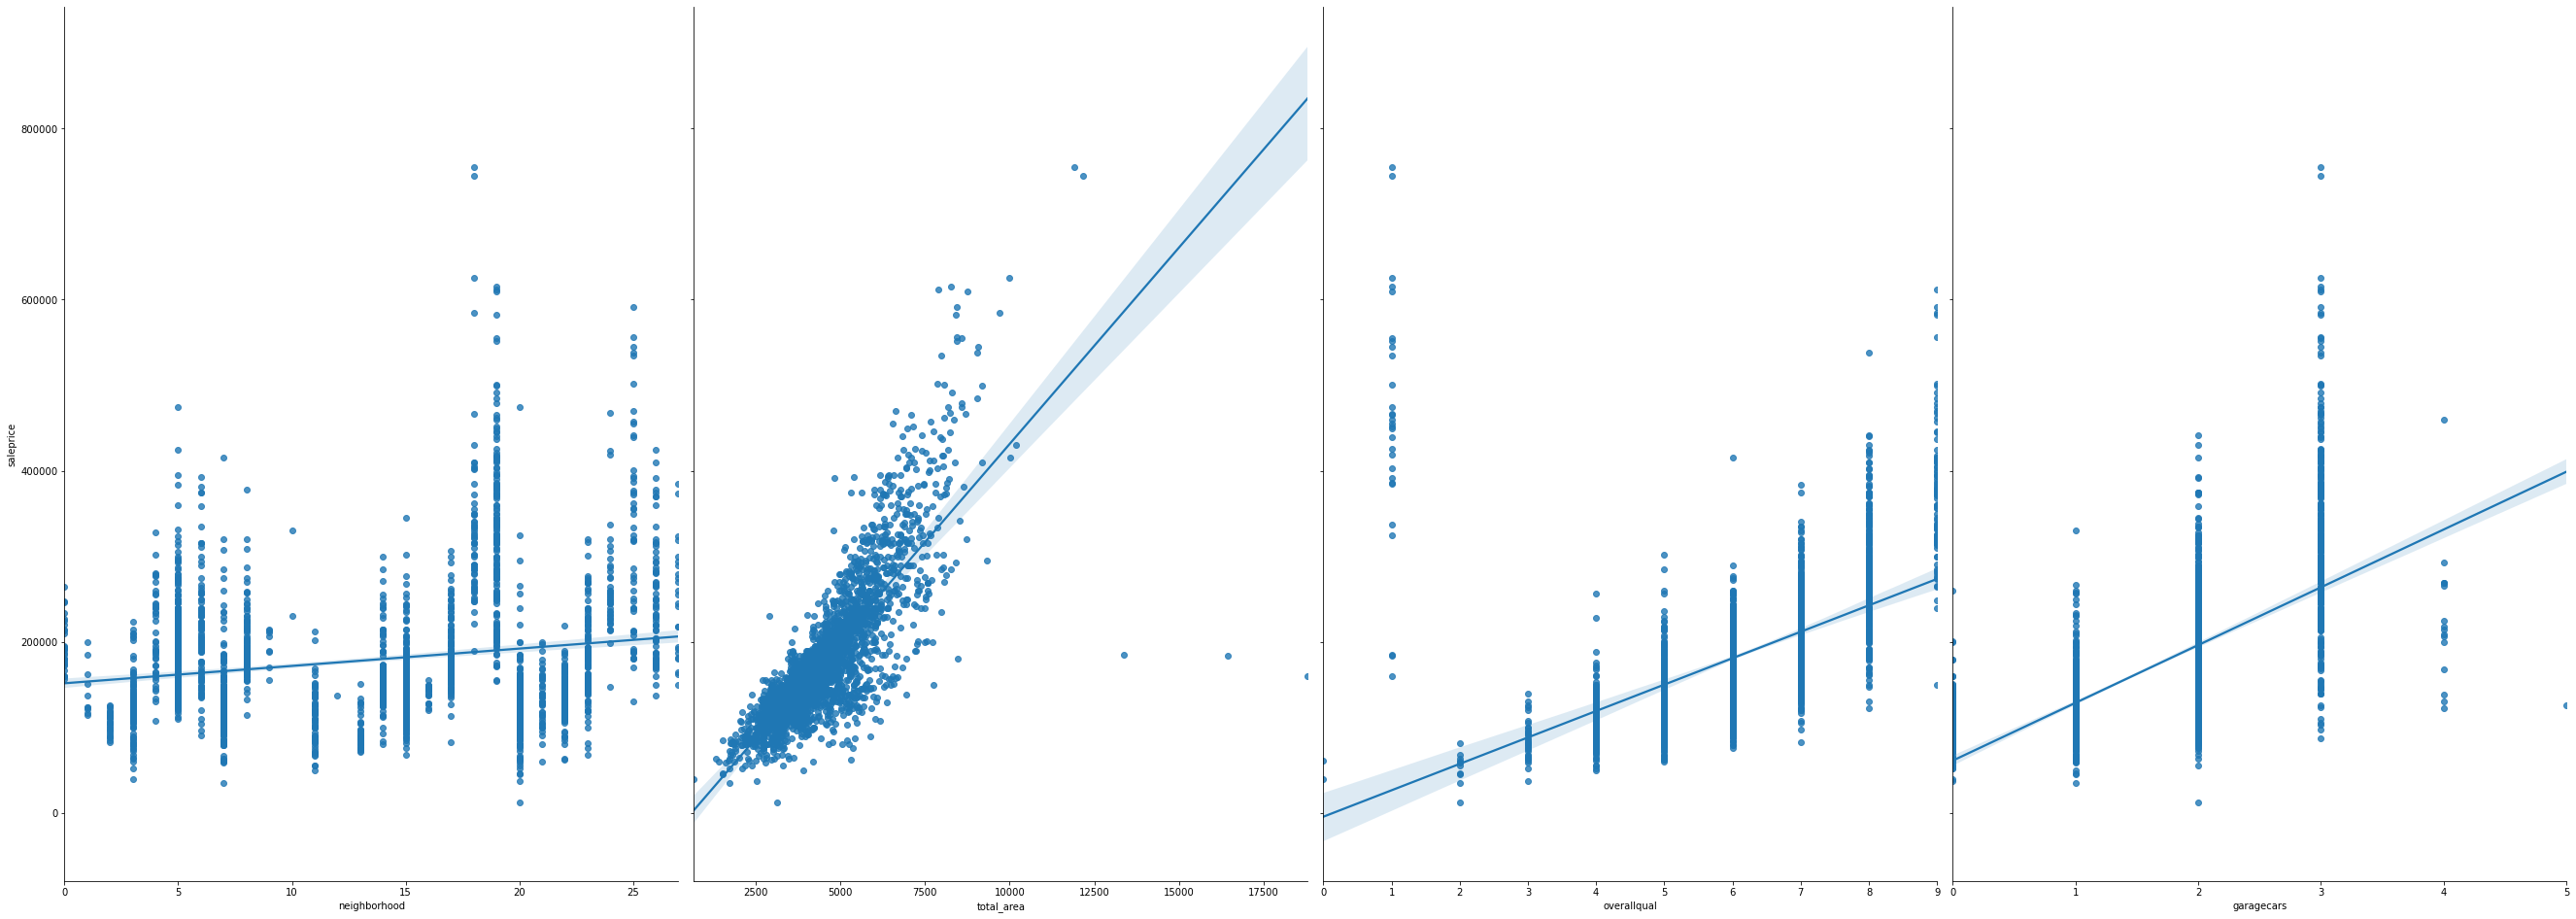

In [143]:
sns.pairplot(df, x_vars=["neighborhood","total_area","overallqual", "garagecars"], y_vars='saleprice', size=13, aspect=0.7, kind='reg')

C:\Users\chiko\anaconda3\envs\PythonData\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


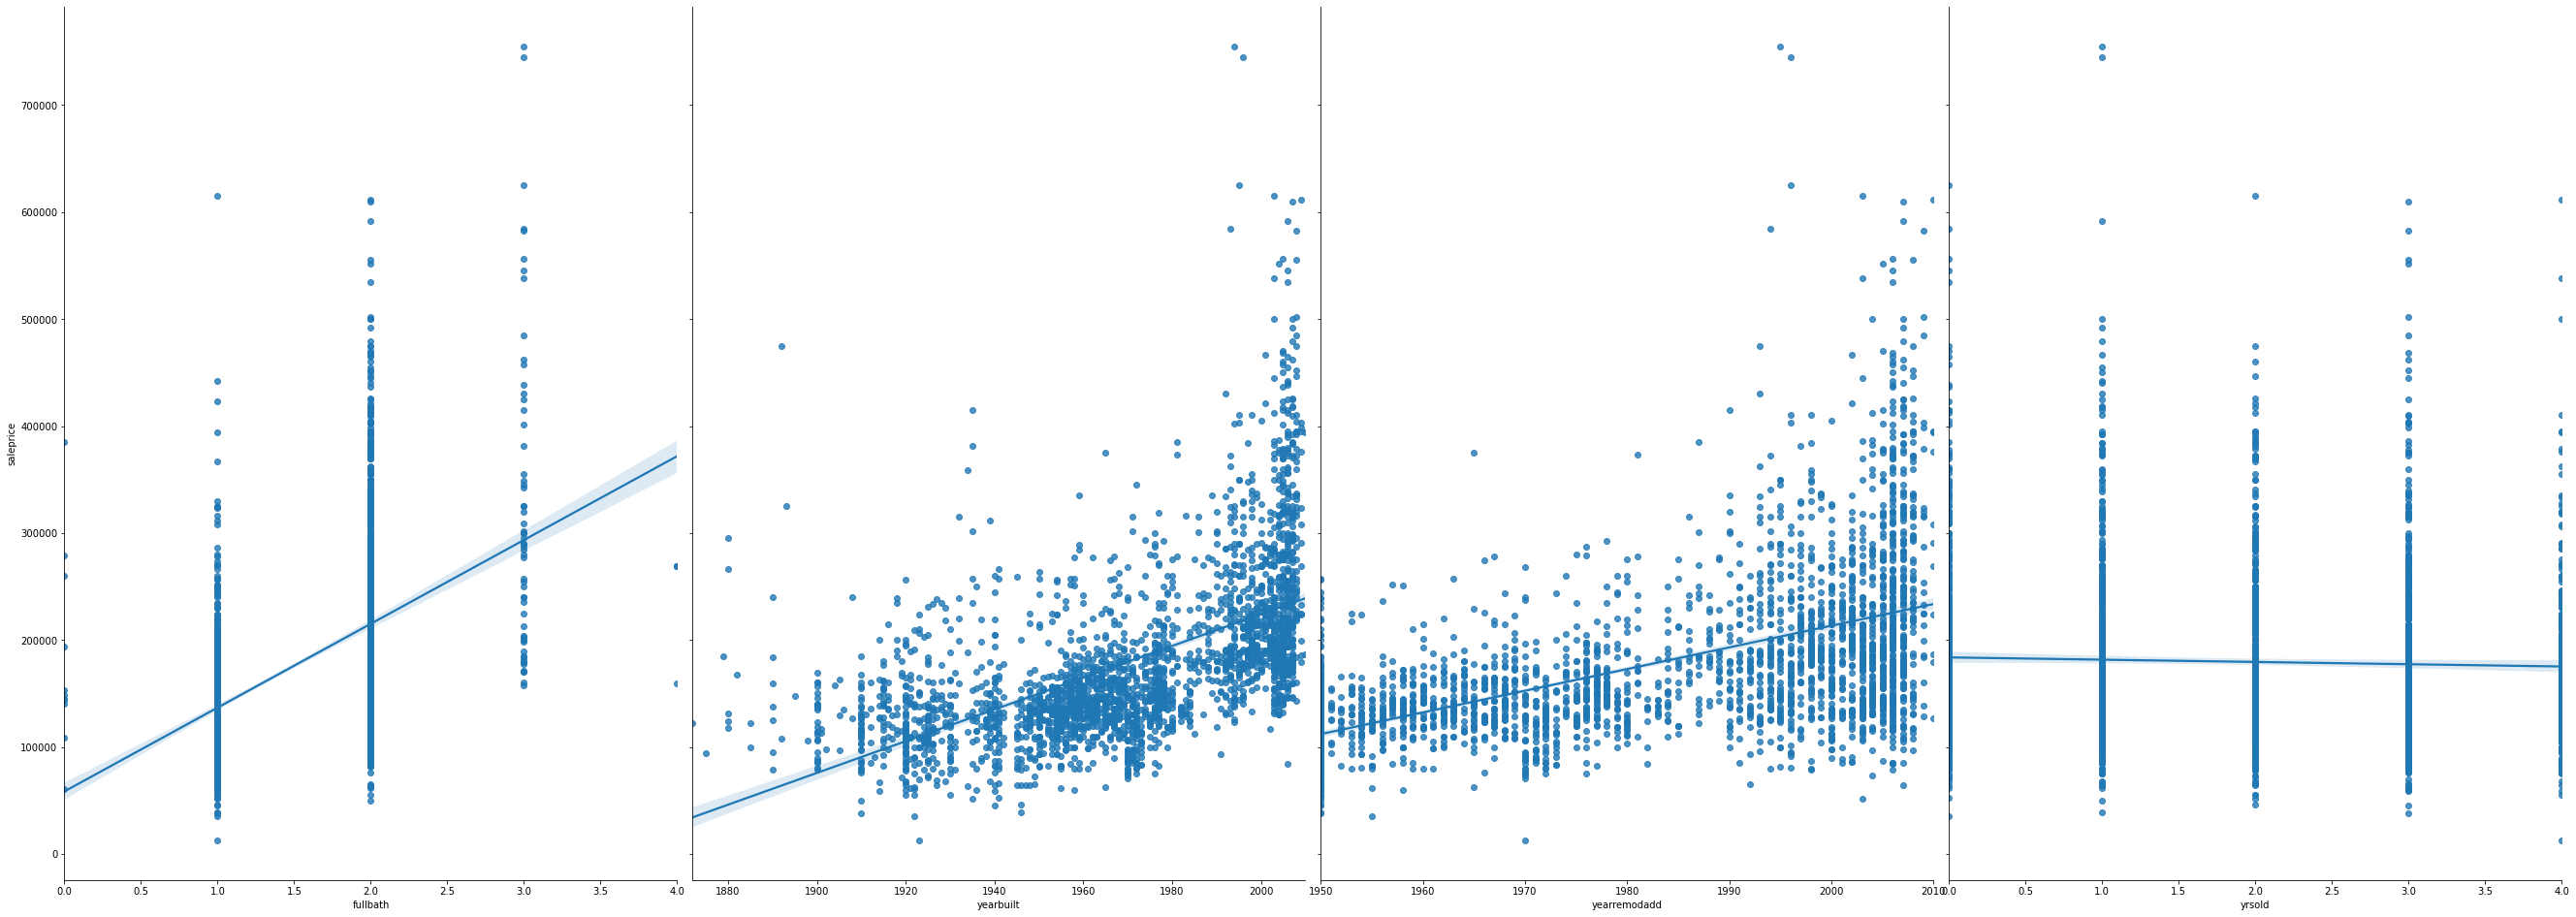

In [144]:
sns.pairplot(df, x_vars=["fullbath","yearbuilt","yearremodadd","yrsold"], y_vars='saleprice', size=13, aspect=0.7, kind='reg')


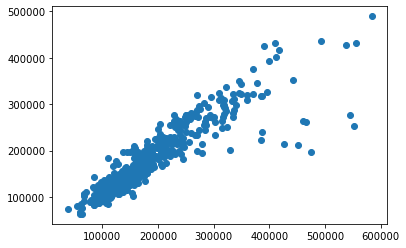

In [188]:
#graph the relationship between y_test and t_test_pred
plt.scatter(y_test, y_test_pred)
plt.show()

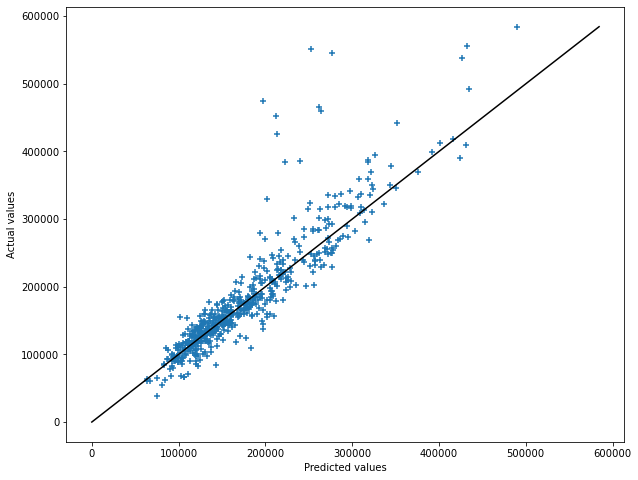

In [196]:
y_test_pred = model.predict(X_test_scaled)
#Plots predicted values against actual values in the train/test split.
plt.figure(figsize=(10,8))
plt.scatter(np.exp(y_test_pred),y_test,marker = '+')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

#Plots x=y line
plt.plot([0,np.max(y_test)],[0,np.max(y_test)], c = 'k');



# Models Comparison


**Comparing Multiple Linear Regression VS Deep Learning in terms of model running time**

In [169]:
#import the recording of the model run time and model result
data = pd.read_csv('Resources/run_time_r2.csv')
data = data.dropna()
data


,Features,MLR_R^2,MLR^Run_Time,DL_R^2,DL_Run_Time
0,64,0.90,0.006,0.91,12.12
1,54,0.90,0.003,0.89,12.38
2,44,0.89,0.003,0.87,12.18
3,34,0.88,0.003,0.81,12.53
4,24,0.86,0.003,0.85,12.31
5,15,0.85,0.002,0.82,12.44
6,11,0.85,0.002,0.88,12.71
7,9,0.85,0.002,0.89,12.80
8,8,0.86,0.002,0.83,12.38


In [170]:
data['DL_Run_Time'].values

array([12.12, 12.38, 12.18, 12.53, 12.31, 12.44, 12.71, 12.8 , 12.38])

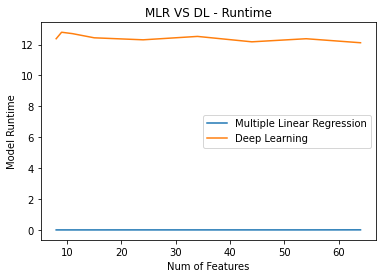

In [197]:
# MLR points 
x1 = [64,54,44,34,24,15,11,9,8] 
y1 = [0.006, 0.003, 0.003, 0.003, 0.003, 0.002, 0.002, 0.002, 0.002] 
# plotting the line 1 points  
plt.plot(x1, y1, label = "Multiple Linear Regression") 
  
# DL points 
x2 = [64,54,44,34,24,15,11,9,8] 
y2 = [12.12, 12.38, 12.18, 12.53, 12.31, 12.44, 12.71, 12.8 , 12.38] 
# plotting the DL points  
plt.plot(x2, y2, label = "Deep Learning") 
  
# naming the x axis 
plt.xlabel('Num of Features') 
# naming the y axis 
plt.ylabel('Model Runtime') 
# giving a title to my graph 
plt.title('MLR VS DL - Runtime') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

**Comparing Multiple Linear Regression VS Deep Learning in terms of R^2**

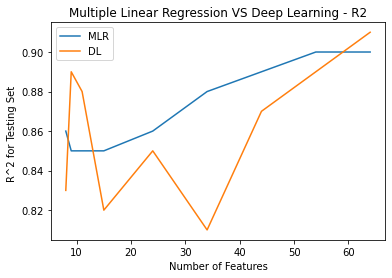

In [198]:
x = data.Features
MLR = data['MLR_R^2']
DL = data['DL_R^2']
fig, ax = plt.subplots()
ax.plot(x,MLR, label='MLR')
ax.plot(x,DL, label='DL')
ax.set_title("Multiple Linear Regression VS Deep Learning - R2")
ax.set_xlabel("Number of Features")
ax.set_ylabel("R^2 for Testing Set ")
ax.legend()

In [ ]:
#Other
# X_scaler.scale_
# X_scaler.inverse_transform
# y_test_pred = np.exp(y_test_pred)
# X_scaler.inverse_transform